<a href="https://colab.research.google.com/github/dreg601/test_task_inno/blob/main/Test_task_inno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Предварительная подготовка

In [1]:
import pandas as pd
import io
import random
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns

Добавление всех библиотек, которые возможно понядобятся для работы.

In [316]:
df_main = pd.read_excel('test_task_inno.xlsx', sheet_name='Выгрузка')
df_main

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.84
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,0.68
2,Емантаев,Аида,Сергеевич,1952-04-23,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",02.00.00 Компьютерные и информационные науки /...,0.72
3,Тарасова,Айгуль,Геннадиевна,1975-09-02,Методист,ФГБОУ ВО &quot;ТАМБОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...,38.00.00 Экономика и управление / 38.02.06 Фи...,0.63
4,Кондрашова,Айша,Талгатовна,1963-12-16,Преподаватель,ФГБОУ ВО КАЗАНСКИЙ ГМУ МИНЗДРАВА РОССИИ,10.00.00 Информационная безопасность / 10.05.0...,0.76
...,...,...,...,...,...,...,...,...
1745,Грошева,Яна,Анатольевна,1979-06-01,Преподаватель,"ФГАОУ ВО ""СЕВАСТОПОЛЬСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...",38.00.00 Экономика и управление / 38.03.01 Эк...,1.00
1746,Богославцева,Яна,Леонидовна,1977-07-14,Преподаватель,"ГАПОУ АО ""АСТРАХАНСКИЙ КОЛЛЕДЖ АРТ-ФЭШН ИНДУСТ...",31.00.00 Клиническая медицина / 31.02.05 Стома...,0.72
1747,Соколова,Яна,Михайловна,1971-04-09,Преподаватель,"ФГБОУ ВО ""КНИТУ""",44.00.00 Образование и педагогические науки / ...,0.76
1748,Звезда,Яна,Николаевна,1979-09-05,Преподаватель,"ФГБОУ ВО ""НГУЭУ"",НГУЭУ",10.00.00 Информационная безопасность / 10.03.0...,0.74


In [317]:
df_route = pd.read_excel('test_task_inno.xlsx', sheet_name='Отрасли-Направления')
df_route

,Отрасль,Направление
0,Городское хозяйство,ООЦ
1,Добывающая промышленность,ООЦ
2,Здравоохранение,ООЦ
3,ИКТ,ЕМЦ
4,Обрабатывающая промышленность,ООЦ
5,Образование,ООЦ
6,Сельское хозяйство,ООЦ
7,Строительство,ООЦ
8,Транспортная инфраструктура,ООЦ
9,Финансовые услуги,ООЦ


In [318]:
df_moder = pd.read_excel('test_task_inno.xlsx', sheet_name='Модераторы')
df_moder

,ФИО,Предпочтительная отрасль
0,Иванов Петр Сергеевич,"ИКТ, Обрабатывающая промышленность"
1,Миронова Дарья Олеговна,"Обрабатывающая промышленность, Образование"
2,Самсонова Татьяна Алекссевна,"Образование, Здравоохранение"
3,Ильин Александр Романович,"Сельское хозяйство, Образование"
4,Куликова Марина Леонидовна,"Строительство, ИКТ"
5,Феоктистова Раяна Зиннуровна,"Транспортная инфраструктура, Добывающая промыш..."
6,Краева Олеся Васильевна,"Финансовые услуги, ИКТ"
7,Насибуллин Альберт Маратович,"Энергетическая инфраструктура, Образование"
8,Гришин Василий Сергеевич,"Общественные науки, Городское хозяйство, Финан..."
9,Хакимуллина Гузель Сабировна,"Городское хозяйство, Финансовые услуги"


Создание дата-фреймов и предварительный просмотр. Как можно посмотреть, во 2 и 3 таблице все заполнено, но 1 таблица слишком большая.

Первый пункт. Проверка дата-фреймов

In [319]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Фамилия                                                     1750 non-null   object        
 1   Имя                                                         1750 non-null   object        
 2   Отчество                                                    1745 non-null   object        
 3   Дата рождения                                               1747 non-null   datetime64[ns]
 4   Роль                                                        1747 non-null   object        
 5   Образовательная организация                                 1748 non-null   object        
 6   Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль  1741 non-null   object        
 7   Балл за тест             

In [320]:
df_main_fi = df_main['Фамилия'] + ' ' + df_main['Имя']
df_main_fi.nunique()

1713

In [321]:
df_main_fi[df_main_fi.duplicated()]

66           Шихов Александр
126            Левин Алексей
240          Негадаев Андрей
256          Курбанов Андрей
434         Захаров Владимир
628         Попова Екатерина
632      Кузнецова Екатерина
647       Комарова Екатерина
654      Кузнецова Екатерина
686          Платонова Елена
687           Тимошина Елена
688          Шаплыгина Елена
707           Андреева Елена
711           Воротнюк Елена
721         Григорьева Елена
723          Соловьева Елена
763            Акулова Елена
821            Убушаев Игорь
873             Мосина Ирина
883          Курманова Ирина
985          Голянова Любовь
1068         Федченко Марина
1070      Духовникова Марина
1169          Кетова Наталия
1219         Ярыгина Наталья
1245          Попова Наталья
1253        Киселева Наталья
1347        Петровская Ольга
1444            Щербак Роман
1552          Сафонов Сергей
1562       Ахметзянов Сергей
1605         Евсеева Татьяна
1619        Матвеева Татьяна
1647      Терентьева Татьяна
1653        См

Неуникальных наборов Имя + Фамилия меньше чем строк в датафрейме. Значит, есть дубликаты. Можно посмотреть на наличие недостающих данных.

In [322]:
df_main_match = df_main[(df_main.Отчество.isnull())]
df_main_match

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест
1083,Логинова,Марина,NaN,1978-10-03,Преподаватель,"ФГБОУ ВО ""ДАГЕСТАНСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРС...",09.00.00 Информатика и вычислительная техника ...,0.89
1254,Матвеева,Наталья,NaN,1983-04-21,Преподаватель,"МОСКОВСКИЙ ПОЛИТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ, МОСКОВ...","11.00.00 Электроника, радиотехника и системы с...",0.64
1411,Пустовалова,Ольга,NaN,1990-09-26,Преподаватель,"СПБГУПТД ФГБОУ ВО ""САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАР...",09.00.00 Информатика и вычислительная техника ...,0.81
1449,Сафаров,Роман,NaN,1977-05-15,Преподаватель,"ЧИСТОПОЛЬСКИЙ ФИЛИАЛ ""ВОСТОК"" ФЕДЕРАЛЬНОГО ГОС...",09.00.00 Информатика и вычислительная техника ...,0.77
1577,Вотякова,Тамара,NaN,1993-01-27,Преподаватель,"ФГБОУ ВО ""НИУ ""МЭИ""",27.00.00 Управление в технических системах / ...,0.69


In [323]:
df_main[(df_main['Дата рождения'].isnull())]

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест
97,Сергеев,Алексей,Борисович,NaT,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",22.00.00 Технологии материалов / 22.03.02 Мета...,0.84
201,Балханова,Анастасия,Петровна,NaT,Преподаватель,САМАРСКИЙ ГОСУДАРСТВЕННЫЙ СОЦИАЛЬНО-ПЕДАГОГИЧЕ...,38.00.00 Экономика и управление / 38.03.02 Ме...,0.78
283,Сатина,Анна,Игоревна,NaT,Методист,"ГАПОУ ТО ""АТК""",38.00.00 Экономика и управление / 38.03.01 Эк...,0.87


In [324]:
df_main[(df_main.Роль.isnull())]

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест
1456,Дубенчук,Рустем,Владимирович,1990-04-24,NaN,"ФГБОУ ВО ""АГТУ""",13.00.00 Электро- и теплоэнергетика / 13.02.06...,0.83
1615,Курьянова,Татьяна,Владимировна,1965-12-02,NaN,ФГБОУ ВО ВОЛОГОДСКАЯ ГМХА,09.00.00 Информатика и вычислительная техника ...,0.75
1742,Еремин,Яков,Анатольевич,1982-03-25,NaN,РОССИЙСКАЯ ТАМОЖЕННАЯ АКАДЕМИЯ,10.00.00 Информационная безопасность / 10.03.0...,0.81


In [325]:
df_main[(df_main['Образовательная организация'].isnull())]

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест
424,Гурьянов,Владимир,Аркадьевич,1984-07-10,Преподаватель,NaN,23.00.00 Техника и технологии наземного трансп...,0.74
485,Барсукова,Галина,Сергеевна,1975-12-02,Преподаватель,NaN,"11.00.00 Электроника, радиотехника и системы с...",0.05


In [326]:
df_main[(df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].isnull())]

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест
205,Сидорская,Анастасия,Сергеевна,1990-06-01,Преподаватель,"ОРЕНБУРГСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ, ОГУ",NaN,0.82
623,Машковцева,Екатерина,Аркадьевна,1985-09-07,Преподаватель,МТУСИ,NaN,0.77
641,Тарасова,Екатерина,Евгеньевна,1971-04-01,Преподаватель,"НГГТИ, ГАОУ ВО ""НЕВИННОМЫССКИЙ ГОСУДАРСТВЕННЫЙ...",NaN,0.81
704,Головастова,Елена,Владимировна,1954-03-26,Методист,ФГБОУ ВО РГАУ-МСХА ИМЕНИ К.А. ТИМИРЯЗЕВА,NaN,0.69
989,Савина,Любовь,Николаевна,1981-07-03,Преподаватель,"ФГБОУ ВО ""РЭУ ИМ. Г.В. ПЛЕХАНОВА"", РЭУ ИМ. Г.В...",NaN,0.88
1301,Медянкина,Оксана,Николаевна,1983-10-29,Преподаватель,"ФГБОУ ВО ""РЭУ ИМ. Г.В. ПЛЕХАНОВА"", РЭУ ИМ. Г.В...",NaN,0.59
1369,Григоренко,Ольга,Вячеславовна,1982-09-13,Преподаватель,"ФГБОУ ВО ""АЛТАЙСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕ...",NaN,0.84
1379,Кутьева,Ольга,Игоревна,1990-11-15,Преподаватель,"ФГБОУ ВО ""РГГМУ"", РГГМУ",NaN,0.75
1382,Амаева,Ольга,Михайловна,1983-09-18,Преподаватель,"ФГБОУ ВО ""ИГУ"", ИГУ, ИРКУТСКИЙ ГОСУДАРСТВЕННЫЙ...",NaN,0.81


Итог первого пункта. Во-первых, в строках есть нулевые значения. Во-вторых, в столбце образовательная организация обнаружены &quot значения. Это аналог кавычек. 

Второй пункт задания

In [340]:
def loc(df_main):
  df_main.dropna(subset=['Отчество'], inplace=True)
  df_main.loc[df_main['Отчество'].str.endswith('вич'), 'Пол'] = 'М'
  df_main.loc[df_main['Отчество'].str.endswith('вна'), 'Пол'] = 'Ж'
  return df_main
loc(df_main)
df_main

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест,Пол,Полных лет
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.84,М,33
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,0.68,М,61
2,Емантаев,Аида,Сергеевич,1952-04-23,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",02.00.00 Компьютерные и информационные науки /...,0.72,М,70
3,Тарасова,Айгуль,Геннадиевна,1975-09-02,Методист,ФГБОУ ВО &quot;ТАМБОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...,38.00.00 Экономика и управление / 38.02.06 Фи...,0.63,Ж,47
4,Кондрашова,Айша,Талгатовна,1963-12-16,Преподаватель,ФГБОУ ВО КАЗАНСКИЙ ГМУ МИНЗДРАВА РОССИИ,10.00.00 Информационная безопасность / 10.05.0...,0.76,Ж,58
...,...,...,...,...,...,...,...,...,...,...
1745,Грошева,Яна,Анатольевна,1979-06-01,Преподаватель,"ФГАОУ ВО ""СЕВАСТОПОЛЬСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...",38.00.00 Экономика и управление / 38.03.01 Эк...,1.00,Ж,43
1746,Богославцева,Яна,Леонидовна,1977-07-14,Преподаватель,"ГАПОУ АО ""АСТРАХАНСКИЙ КОЛЛЕДЖ АРТ-ФЭШН ИНДУСТ...",31.00.00 Клиническая медицина / 31.02.05 Стома...,0.72,Ж,45
1747,Соколова,Яна,Михайловна,1971-04-09,Преподаватель,"ФГБОУ ВО ""КНИТУ""",44.00.00 Образование и педагогические науки / ...,0.76,Ж,51
1748,Звезда,Яна,Николаевна,1979-09-05,Преподаватель,"ФГБОУ ВО ""НГУЭУ"",НГУЭУ",10.00.00 Информационная безопасность / 10.03.0...,0.74,Ж,43


In [341]:
df_main["Полных лет"] = \
    (pd.to_datetime("today") - df_main["Дата рождения"]).astype('<m8[Y]')
df_main.round()

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест,Пол,Полных лет
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,1.0,М,33.0
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,1.0,М,61.0
2,Емантаев,Аида,Сергеевич,1952-04-23,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",02.00.00 Компьютерные и информационные науки /...,1.0,М,70.0
3,Тарасова,Айгуль,Геннадиевна,1975-09-02,Методист,ФГБОУ ВО &quot;ТАМБОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...,38.00.00 Экономика и управление / 38.02.06 Фи...,1.0,Ж,47.0
4,Кондрашова,Айша,Талгатовна,1963-12-16,Преподаватель,ФГБОУ ВО КАЗАНСКИЙ ГМУ МИНЗДРАВА РОССИИ,10.00.00 Информационная безопасность / 10.05.0...,1.0,Ж,58.0
...,...,...,...,...,...,...,...,...,...,...
1745,Грошева,Яна,Анатольевна,1979-06-01,Преподаватель,"ФГАОУ ВО ""СЕВАСТОПОЛЬСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...",38.00.00 Экономика и управление / 38.03.01 Эк...,1.0,Ж,43.0
1746,Богославцева,Яна,Леонидовна,1977-07-14,Преподаватель,"ГАПОУ АО ""АСТРАХАНСКИЙ КОЛЛЕДЖ АРТ-ФЭШН ИНДУСТ...",31.00.00 Клиническая медицина / 31.02.05 Стома...,1.0,Ж,45.0
1747,Соколова,Яна,Михайловна,1971-04-09,Преподаватель,"ФГБОУ ВО ""КНИТУ""",44.00.00 Образование и педагогические науки / ...,1.0,Ж,51.0
1748,Звезда,Яна,Николаевна,1979-09-05,Преподаватель,"ФГБОУ ВО ""НГУЭУ"",НГУЭУ",10.00.00 Информационная безопасность / 10.03.0...,1.0,Ж,43.0


In [342]:
df_main['Полных лет'] = df_main['Полных лет'].astype("Int64")
df_main

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест,Пол,Полных лет
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.84,М,33
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,0.68,М,61
2,Емантаев,Аида,Сергеевич,1952-04-23,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",02.00.00 Компьютерные и информационные науки /...,0.72,М,70
3,Тарасова,Айгуль,Геннадиевна,1975-09-02,Методист,ФГБОУ ВО &quot;ТАМБОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...,38.00.00 Экономика и управление / 38.02.06 Фи...,0.63,Ж,47
4,Кондрашова,Айша,Талгатовна,1963-12-16,Преподаватель,ФГБОУ ВО КАЗАНСКИЙ ГМУ МИНЗДРАВА РОССИИ,10.00.00 Информационная безопасность / 10.05.0...,0.76,Ж,58
...,...,...,...,...,...,...,...,...,...,...
1745,Грошева,Яна,Анатольевна,1979-06-01,Преподаватель,"ФГАОУ ВО ""СЕВАСТОПОЛЬСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...",38.00.00 Экономика и управление / 38.03.01 Эк...,1.00,Ж,43
1746,Богославцева,Яна,Леонидовна,1977-07-14,Преподаватель,"ГАПОУ АО ""АСТРАХАНСКИЙ КОЛЛЕДЖ АРТ-ФЭШН ИНДУСТ...",31.00.00 Клиническая медицина / 31.02.05 Стома...,0.72,Ж,45
1747,Соколова,Яна,Михайловна,1971-04-09,Преподаватель,"ФГБОУ ВО ""КНИТУ""",44.00.00 Образование и педагогические науки / ...,0.76,Ж,51
1748,Звезда,Яна,Николаевна,1979-09-05,Преподаватель,"ФГБОУ ВО ""НГУЭУ"",НГУЭУ",10.00.00 Информационная безопасность / 10.03.0...,0.74,Ж,43


In [343]:
df_main[df_main.Пол =='Ж'].count()

Фамилия                                                       1144
Имя                                                           1144
Отчество                                                      1144
Дата рождения                                                 1142
Роль                                                          1143
Образовательная организация                                   1143
Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль    1135
Балл за тест                                                  1144
Пол                                                           1144
Полных лет                                                    1142
dtype: int64

In [344]:
df_main[df_main.Пол =='М'].count()

Фамилия                                                       586
Имя                                                           586
Отчество                                                      586
Дата рождения                                                 585
Роль                                                          584
Образовательная организация                                   585
Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль    586
Балл за тест                                                  586
Пол                                                           586
Полных лет                                                    585
dtype: int64

Как можно заметить, лиц женского пола в два раза больше, чем лиц мужского.

Третий пункт

In [345]:
def loc(df_main):
  df_main.dropna(subset=['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'], inplace=True)
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Городское хозяйство'), 'Отрасль'] = 'Городское хозяйство'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Добывающая промышленность'), 'Отрасль'] = 'Добывающая промышленность'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Здравоохранение'), 'Отрасль'] = 'Здравоохранение'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ ИКТ'), 'Отрасль'] = 'ИКТ'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Обрабатывающая промышленность'), 'Отрасль'] = 'Обрабатывающая промышленность'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Образование'), 'Отрасль'] = 'Образование'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Сельское хозяйство'), 'Отрасль'] = 'Сельское хозяйство'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Строительство'), 'Отрасль'] = 'Строительство'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Транспортная инфраструктура'), 'Отрасль'] = 'Транспортная инфраструктура'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Финансовые услуги'), 'Отрасль'] = 'Финансовые услуги'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Энергетическая инфраструктура'), 'Отрасль'] = 'Энергетическая инфраструктура'
  df_main.loc[df_main['Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль'].str.contains('/ Общественные науки'), 'Отрасль'] = 'Общественные науки'  
  return df_main
loc(df_main)
df_main

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест,Пол,Полных лет,Отрасль
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.84,М,33,Образование
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,0.68,М,61,Образование
2,Емантаев,Аида,Сергеевич,1952-04-23,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",02.00.00 Компьютерные и информационные науки /...,0.72,М,70,ИКТ
3,Тарасова,Айгуль,Геннадиевна,1975-09-02,Методист,ФГБОУ ВО &quot;ТАМБОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...,38.00.00 Экономика и управление / 38.02.06 Фи...,0.63,Ж,47,Финансовые услуги
4,Кондрашова,Айша,Талгатовна,1963-12-16,Преподаватель,ФГБОУ ВО КАЗАНСКИЙ ГМУ МИНЗДРАВА РОССИИ,10.00.00 Информационная безопасность / 10.05.0...,0.76,Ж,58,ИКТ
...,...,...,...,...,...,...,...,...,...,...,...
1745,Грошева,Яна,Анатольевна,1979-06-01,Преподаватель,"ФГАОУ ВО ""СЕВАСТОПОЛЬСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...",38.00.00 Экономика и управление / 38.03.01 Эк...,1.00,Ж,43,Финансовые услуги
1746,Богославцева,Яна,Леонидовна,1977-07-14,Преподаватель,"ГАПОУ АО ""АСТРАХАНСКИЙ КОЛЛЕДЖ АРТ-ФЭШН ИНДУСТ...",31.00.00 Клиническая медицина / 31.02.05 Стома...,0.72,Ж,45,Здравоохранение
1747,Соколова,Яна,Михайловна,1971-04-09,Преподаватель,"ФГБОУ ВО ""КНИТУ""",44.00.00 Образование и педагогические науки / ...,0.76,Ж,51,Образование
1748,Звезда,Яна,Николаевна,1979-09-05,Преподаватель,"ФГБОУ ВО ""НГУЭУ"",НГУЭУ",10.00.00 Информационная безопасность / 10.03.0...,0.74,Ж,43,ИКТ


In [346]:
df_main.merge(df_route)

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест,Пол,Полных лет,Отрасль,Направление
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.84,М,33,Образование,ООЦ
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,0.68,М,61,Образование,ООЦ
2,Сайфуллин,Александр,Александрович,1994-04-21,Преподаватель,ВЮИ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.70,М,28,Образование,ООЦ
3,Нестеренко,Александр,Александрович,1963-03-10,Методист,"ТУСУР, ФГБОУ ВО ""ТУСУР"", ФГБОУ ВО ""ТОМСКИЙ ГОС...",44.00.00 Образование и педагогические науки / ...,0.67,М,59,Образование,ООЦ
4,Василец,Александр,Васильевич,1975-05-08,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",44.00.00 Образование и педагогические науки / ...,0.78,М,47,Образование,ООЦ
...,...,...,...,...,...,...,...,...,...,...,...,...
1731,Купряшкин,Сергей,Владимирович,1987-06-16,Преподаватель,САМАРСКИЙ ФИНАНСОВО-ЭКОНОМИЧЕСКИЙ КОЛЛЕДЖ - ФИ...,13.00.00 Электро- и теплоэнергетика / 13.03.01...,0.75,М,35,Энергетическая инфраструктура,ООЦ
1732,Агронина,Тамара,Анатольевна,1952-10-12,Преподаватель,"ИРНИТУ, ФГБОУ ВО ""ИРНИТУ"", ""ИРКУТСКИЙ ПОЛИТЕХ""",13.00.00 Электро- и теплоэнергетика / 13.03.02...,0.82,Ж,70,Энергетическая инфраструктура,ООЦ
1733,Андреева,Юлия,Вячеславовна,1974-04-21,Преподаватель,ИНСТИТУТ НЕФТИ И ТЕХНОЛОГИЙ (ФИЛИАЛ) ФЕДЕРАЛЬН...,13.00.00 Электро- и теплоэнергетика / 13.03.03...,0.83,Ж,48,Энергетическая инфраструктура,ООЦ
1734,Жаркая,Юлия,Сергеевна,1984-07-30,Преподаватель,"ФГБОУ ВО ""ПГУ"", ПЕНЗЕНСКИЙ ГОСУДАРСТВЕННЫЙ УНИ...",13.00.00 Электро- и теплоэнергетика / 13.04.02...,0.74,Ж,38,Энергетическая инфраструктура,ООЦ


Тут необходимо было просто смержить таблицы

Четвертый пункт

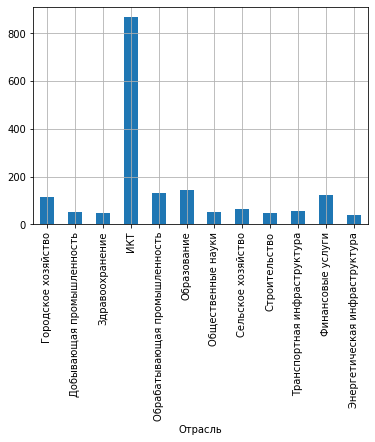

In [347]:
df_main.groupby(by = ['Отрасль'])['Фамилия'].count().plot(kind = 'bar', grid= True)

Это можно и к 5 отнести. Наибольшее количество студентов обучаются в ИКТ отрасли.

In [348]:
d = df_moder.set_index('ФИО').T.to_dict('dict')
random.choice(list(d.values()))

{'Предпочтительная отрасль': 'ИКТ, Обрабатывающая промышленность'}

In [349]:
def loc(df_main):
  df_main.loc[df_main['Отрасль'].str.contains('Городское хозяйство'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Добывающая промышленность'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Здравоохранение'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('ИКТ'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Обрабатывающая промышленность'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Образование'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Сельское хозяйство'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Строительство'), 'ФИО модера'] = random.choice(list(d.keys())) 
  df_main.loc[df_main['Отрасль'].str.contains('Транспортная инфраструктура'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Финансовые услуги'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Энергетическая инфраструктура'), 'ФИО модера'] = random.choice(list(d.keys()))
  df_main.loc[df_main['Отрасль'].str.contains('Общественные науки'), 'ФИО модера'] = random.choice(list(d.keys())) 
  return df_main

for i in range(len(df_main)):
  loc(df_main)
df_main

,Фамилия,Имя,Отчество,Дата рождения,Роль,Образовательная организация,Укрупненные группы направлений подготовки/ФГОС 3++/Отрасль,Балл за тест,Пол,Полных лет,Отрасль,ФИО модера
0,Ходырев,Абдурагим,Викторович,1989-01-19,Преподаватель,ВИПЭ ФСИН РОССИИ,44.00.00 Образование и педагогические науки / ...,0.84,М,33,Образование,Гришин Василий Сергеевич
1,Прохоров,Абуталиб,Леонидович,1961-06-03,Преподаватель,ДОНСКОЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕ...,44.00.00 Образование и педагогические науки / ...,0.68,М,61,Образование,Гришин Василий Сергеевич
2,Емантаев,Аида,Сергеевич,1952-04-23,Преподаватель,"КНИТУ-КАИ,ФГБОУ ВО ""КНИТУ-КАИ"",КАЗАНСКИЙ НАЦИО...",02.00.00 Компьютерные и информационные науки /...,0.72,М,70,ИКТ,Ильин Александр Романович
3,Тарасова,Айгуль,Геннадиевна,1975-09-02,Методист,ФГБОУ ВО &quot;ТАМБОВСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...,38.00.00 Экономика и управление / 38.02.06 Фи...,0.63,Ж,47,Финансовые услуги,Феоктистова Раяна Зиннуровна
4,Кондрашова,Айша,Талгатовна,1963-12-16,Преподаватель,ФГБОУ ВО КАЗАНСКИЙ ГМУ МИНЗДРАВА РОССИИ,10.00.00 Информационная безопасность / 10.05.0...,0.76,Ж,58,ИКТ,Ильин Александр Романович
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,Грошева,Яна,Анатольевна,1979-06-01,Преподаватель,"ФГАОУ ВО ""СЕВАСТОПОЛЬСКИЙ ГОСУДАРСТВЕННЫЙ УНИВ...",38.00.00 Экономика и управление / 38.03.01 Эк...,1.00,Ж,43,Финансовые услуги,Феоктистова Раяна Зиннуровна
1746,Богославцева,Яна,Леонидовна,1977-07-14,Преподаватель,"ГАПОУ АО ""АСТРАХАНСКИЙ КОЛЛЕДЖ АРТ-ФЭШН ИНДУСТ...",31.00.00 Клиническая медицина / 31.02.05 Стома...,0.72,Ж,45,Здравоохранение,Новик Алексей Федорович
1747,Соколова,Яна,Михайловна,1971-04-09,Преподаватель,"ФГБОУ ВО ""КНИТУ""",44.00.00 Образование и педагогические науки / ...,0.76,Ж,51,Образование,Гришин Василий Сергеевич
1748,Звезда,Яна,Николаевна,1979-09-05,Преподаватель,"ФГБОУ ВО ""НГУЭУ"",НГУЭУ",10.00.00 Информационная безопасность / 10.03.0...,0.74,Ж,43,ИКТ,Ильин Александр Романович


Пятый пункт

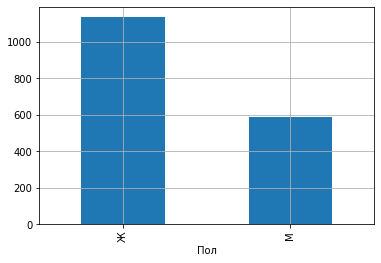

In [350]:
df_main.groupby(by = ['Пол'])['Фамилия'].count().plot(kind = 'bar', grid= True)

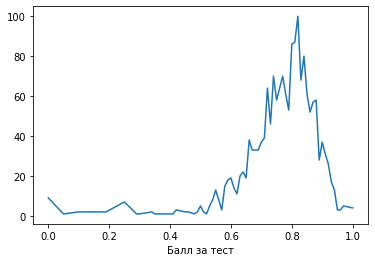

In [356]:
df_main.groupby(by = ['Балл за тест'])['Фамилия'].count().plot()

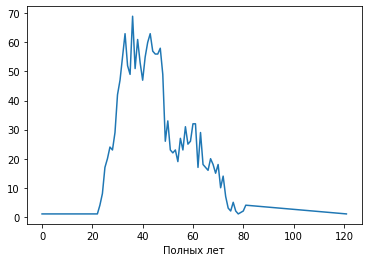

In [357]:
df_main.groupby(by = ['Полных лет'])['Фамилия'].count().plot()

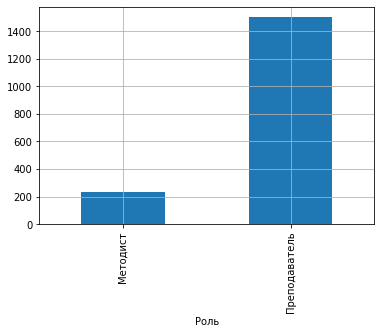

In [359]:
df_main.groupby(by = ['Роль'])['Фамилия'].count().plot(kind = 'bar', grid= True)